<a href="https://colab.research.google.com/github/rajprakrit/ML-Library-1/blob/master/Linear_Regression_ML_Lib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [0]:
class LinearRegression:
    '''A class defined for training a linear regression model '''
    def __init__(self, learning_rate=0.00001, n_iters=10000):  #default values of parameters are set
        '''
        init parameters are set for every object of this class

        ''' 
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        '''
        In this part, we train our model by feeding examples to it so that it can learn some parameters on which model can be defined.
        Gradient descent is used to optimize the M.S.E cost function  over parameters weights and bias.
        we update the value of parameters n_iters number of time so that we could reach an optimal value.
        '''
        n_samples, n_features = X.shape

        # init parameters are initialized(defined for every object in class)
        self.weights = np.zeros(n_features)
        self.bias = 0
        J_history = np.empty(self.n_iters)

        # gradient descent(training algorithm)
        for i in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # simultaneous update for parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            J_history[i] = np.sum((self.predict(X) - y)**2)/(2*n_samples) #storing value of cost function in a rank one array to plot the learning curve

        iters = np.arange(self.n_iters) 
        plt.plot(iters, J_history) #plotting of the learning curve
        J = np.sum((self.predict(X) - y)**2)/(2*n_samples)
        return J
        

    def predict(self, X):
      '''this method predicts the target based upon new parametrs '''
      y_approximated = np.dot(X, self.weights) + self.bias 
      return y_approximated

    def _accuracy(self, X, y):


      '''We are using Linear Regression as a classifier.So, we need to define a threshold value such that we could predict descrete outputs.
        Considering an example:Let's suppose our model predicts 5.4 but our labels are integer value, so we say that if prediction is between label - 0.5 and label +0.5
        then we can say our output is 5(in this example).
        So, we try to find the maximum value of our accuray by cosidering threshold from 0 to 0.9.
        We initalize acc to zero and update it if we get a greater accuracy.
      '''
         
      predicted = self.predict(X)
      predict = predicted - y #getting difference of predicted and actual to get the threshold
      acc = 0 #initializing accuray 
      for i in range (10): #iterating over values 0 to 9 as threshold
        a = np.sum(predict<i/10) 
        b = np.sum(predict<= (i/10)-1)
        acc = max((a-b)/len(predict), acc) #(a - b) denotes number of entries in predict which are <= i/10 or greater than (i/10) - 1
   
      return acc*100

    def train_test_split(self, X, y, ratio): #creating a method for train test split of our dataset
        '''
        simple train test split method
        
        '''
        size = X.shape[0];
        count = size*(1-ratio)
        count = int(count)
        X_train = X[:count]
        y_train = y[:count]
        X_test = X[count:]
        y_test = y[count:]

        return X_train, X_test, y_train, y_test

In [0]:
mnist = datasets.load_digits()  #getting mnist dataset

In [0]:
X, y = mnist.data, mnist.target

In [0]:
regressor = LinearRegression() #creating an object regressor

In [0]:
X_train, X_test, y_train, y_test = regressor.train_test_split(X, y, 0.2) #splitting of data in 80 to 20 ratio

1.7558248146306437

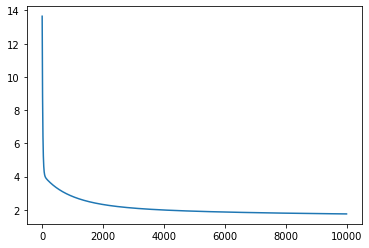

In [15]:
regressor.fit(X_train, y_train) #training our model

**The final cost is 1.7558248146306437**

In [0]:
max_accuracy = regressor._accuracy(X_test, y_test) #fetching max accuracy of our model

In [17]:
max_accuracy

23.333333333333332

Lets consider one of our **Example**

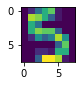

In [18]:
plt.figure(figsize=(1,1))
plt.imshow(X_test[3].reshape((8,8)))

In [0]:
k = regressor.predict(X_test[3])  ##Close to  which can be interpredted from X_train figure

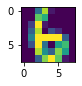

In [20]:
plt.figure(figsize=(1,1))
plt.imshow(X_test[4].reshape((8,8)))

In [21]:
y_test[4]

6

In [22]:
regressor.predict(X_test[4])

5.031764215291022

***USING SKLEARN TO TRAIN OUR MODEL***

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
regressor1 = LinearRegression()

In [25]:
regressor1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
predictions = regressor1.predict(X_test)

In [0]:
#getting accuracy on basis of some threshold
def _accuracy1(predictions, y):
  predict = predictions - y #getting difference of predicted and actual to get the threshold
  acc = 0 #initializing accuray 
  for i in range (10): #iterating over values 0 to 9 as threshold
    a = np.sum(predict<i/10) 
    b = np.sum(predict<= (i/10)-1)
    acc = max((a-b)/len(predict), acc) # (a - b) denotes number of entries in predict which are <= i/10 or greater than (i/10) - 1

  return acc*100

In [28]:
_accuracy1(predictions, y_test)

22.22222222222222

**accuracy from my model = 23.33% and from sklearn is 22.22%**